# Heartrate Variability - Kalume Lab

Reads in an EDF file then:
1. Plots all data channels
2. Finds peaks in respiratory and cardiac data
3. Finds relationship between breath peaks and cardiac peaks
4. (Future) Finds spectral density of EMG and Right/Left EEG
5. (Future) Calculate coherence in Right/Left EEG
6. (Future) Calculate coherence between ECG, EEG, and EMG



## User Input

In [1]:

#dir_in = r"D:\Dropbox\Code\Heartrate Variability\kalume_data"
file_in = r"Synchrony_EEG_ECG_RESP_K6527_HmzNdufsCrep_10_06_16_TISel.edf" 
amp_channels = [8,9,12,13] # Channel #s you want to analyze by amplitude
freq_channels = [10,11,14] # Channel #s you want to analyze by frequency
plot_start_time = 0 # The time (in minutes) that you want to start analyzing the recording

# Values can be "all" (with quotation marks) or a number indicating the number of minutes 
plot_length = "all"  # Length of Recording you wannt to analyze
template_start_time = plot_start_time  # Start time (in min) for defining the templates
template_search_length = 0.05   # Length of recording for measuring the templates
sample_rate = 1000 # In Hz

# plot start can't be bigger plot_end
#template start needs fixing
# > 30s of stillness (in EMG)
# 50% overlap in FFT window of EMG

### Import Packages

In [2]:
import pyedflib
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Default Values

In [3]:
file_open = 0   # 0 = EDF file hasn't been opened, 1 = it has been opened
threshold = 0
start = 0
plot_start_time = int(plot_start_time * 60 * sample_rate)
template_start_time = int(template_start_time * 60 * sample_rate)
all_channels = sorted(amp_channels + freq_channels)
all_signals = [chan - 1 for chan in all_channels]
amp_signals = [chan-1 for chan in amp_channels] 
freq_signals = [chan-1 for chan in freq_channels]

### Function Definitions

In [4]:
def plot_signal (fig, ax, signal):
    x = list(range(0,len(sigbufs[0,:])))
    y = sigbufs[signal,:]
    ax.plot(x,y)
    
def get_plot_length (plot_length, sigbufs):
    if plot_length == 'all':
        plot_end_time = len(sigbufs[0,:])
    elif plot_length > len(sigbufs[0,:]):
        plot_end_time = len(sigbufs[0,:])
    elif plot_length < 0:
        print ("USER ERROR: Cannot plot a negative plot_length.")
    else:
        plot_end_time = plot_length * (60*sample_rate)
    return int(plot_end_time)

def get_edf (dir_in, file_in, file_open):
    if file_open == 0:
        file_name = os.path.join(dir_in, file_in)
        f = pyedflib.EdfReader(file_name)
        file_open = 1
    else:
        pass
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i,:] = f.readSignal(i)
    return signal_labels, sigbufs

def plot_all(signals, sigbufs,signal_labels, start, end):
    fig_rows = len(signals)
    fig_cols = 1
    i = 0

    fig, [ax1,ax2,ax3,ax4,ax5,ax6,ax7] = plt.subplots(fig_rows, fig_cols, sharex=True, figsize = (10,15), dpi = 100)
    for i in range (0,len (signals)):
        signal = signals[i]
        time = list(range(0,len(sigbufs[0,start:end])))
        x = []
        for t in time:
            tmp = t/60000
            x.append(tmp)
        
        if i == 0: # Ch8
            y = sigbufs[signal,start:end]
            ax1.plot(x,y, lw = 1, color = "purple")
            ax1.spines['top'].set_visible(False)
            ax1.spines['right'].set_visible(False)
            ax1.set_xlim (0, max(x))
            ax1.set_title ('Raw Respiration', loc = 'left')
            ax1.set_ylabel(signal_labels[i] + "(V) ", fontsize = 12)
            
        elif i == 1: # Ch9
            y = sigbufs[signal,start:end]
            ax2.plot(x,y, lw = 1, color = "darkgreen")
            ax2.spines['top'].set_visible(False)
            ax2.spines['right'].set_visible(False)
            ax2.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax2.set_title ('Filtered Respiration', loc = 'left')
        elif i == 2: # Ch10
            y = sigbufs[signal,start:end]
            ax3.plot(x,y, lw = 1, color = "orangered")
            ax3.spines['top'].set_visible(False)
            ax3.spines['right'].set_visible(False)
            ax3.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax3.set_title ('EEG Left', loc = 'left')
        elif i == 3: # Ch11
            y = sigbufs[signal,start:end]
            ax4.plot(x,y, lw = 1, color = "blue")
            ax4.spines['top'].set_visible(False)
            ax4.spines['right'].set_visible(False)
            ax4.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax4.set_title ('EEG Right', loc = 'left')
        elif i == 4: # Ch12
            y = sigbufs[signal,start:end]
            ax5.plot(x,y, lw = 1, color = "green")
            ax5.spines['top'].set_visible(False)
            ax5.spines['right'].set_visible(False)
            ax5.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax5.set_title ('ECG', loc = 'left')
        elif i == 5: # Ch13
            y = sigbufs[signal,start:end]
            ax6.plot(x,y, lw = 1, color = "magenta")
            ax6.set_xlabel ("Time (min)", fontsize = 14)
            ax6.spines['top'].set_visible(False)
            ax6.spines['right'].set_visible(False)
            ax6.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax6.set_title ('EMG', loc = 'left')
        elif i == 6: # Ch14
            y = sigbufs[signal,start:end]
            ax7.plot(x,y, lw = 1, color = "magenta")
            ax7.set_xlabel ("Time (min)", fontsize = 14)
            ax7.spines['top'].set_visible(False)
            ax7.spines['right'].set_visible(False)
            ax7.set_ylabel(signal_labels[signals[i]] + "(BPM) ", fontsize = 12)
            ax7.set_title ('Respiration Rate', loc = 'left')
        elif i == 7: # Ch14
            y = sigbufs[signal,start:end] 
            ax8.plot(x,y, lw = 1, color = "blue")
            ax8.set_xlabel ("Time (min)", fontsize = 14)
            ax8.spines['top'].set_visible(False)
            ax8.spines['right'].set_visible(False)
            ax8.set_ylabel(signal_labels[signals[i]] + "(BPM) ", fontsize = 12)
            ax8.set_title ('Instantaneous Heart Rate', loc = 'left')
        elif i == 8: # Ch14
            y = sigbufs[signal,start:end]
            ax9.scatter(x,y, s = 1, marker = ".", color = "black")
            ax9.set_xlabel ("Time (min)", fontsize = 14)
            ax9.spines['top'].set_visible(False)
            ax9.spines['right'].set_visible(False)     
            ax9.set_ylabel(signal_labels[signals[i]] + "(V) ", fontsize = 12)
            ax9.set_title ('Synchrony', loc = 'left')
        i = i + 1
    fig.tight_layout()
    
def get_event(start, length, signal, sigbufs, threshold, plot_results):
    events = []
    # 1st pass threshold == 0
    end = get_plot_length(length, sigbufs)
    x = list(range(0,len(sigbufs[signal,start:end])))
    y = sigbufs[signal,start:end]
    if threshold == 0:
        threshold = ((max(y) - min(y))*.1) 
        
    
    baseline_x = []
    baseline_y = []
    i = 0
    y = sigbufs[signal,x[i]]
    while i < len(x)-1:
        #if y < threshold and y > -1*threshold:
        if y < threshold and y > -1*threshold:     
            while y < threshold and i < len(x)-1:
                baseline_x.append (x[i])
                baseline_y.append (y)
                i = i + 1
                y = sigbufs[signal,x[i]]
        elif y >= threshold:
            event_x = []
            event_y = []
            x_out = 0
            while y > threshold and i < len(x)-1:
                event_x.append (x_out)
                event_y.append (y)
                i = i + 1
                x_out = x_out + 1
                y = sigbufs[signal,x[i]]
            event = {'x': event_x, 'y': event_y}
            events.append (event)
        else: 
            i = i + 1
            y = sigbufs[signal,x[i]]
    
            

    baseline_mean = np.mean(baseline_y)
    baseline_std = np.std(baseline_y)
    
    if plot_results == True:
        fig, ax = plt.subplots(figsize = (10,3), dpi = 100)
        ax.plot(x, sigbufs[signal,start:end], color = 'darkgray')
        ax.axhline(baseline_mean, color = "k", ls = "solid", label = "Baseline Mean = " + str(round(baseline_mean,3)))
        ax.axhline(baseline_mean + baseline_std, color='b', linestyle=':', label = "1*std = " + str(round(baseline_std,3)))
        ax.axhline(baseline_mean + 2*baseline_std, color='r', linestyle=':', label = "2*std = " + str(round(baseline_std*2,3)))
        ax.axhline(baseline_mean + 3*baseline_std, color='m', linestyle=':', label = "3*std = " + str(round(baseline_std*3,3)))
        ax.axhline(baseline_mean + 4*baseline_std, color='purple', linestyle=':', label = "4*std = " + str(round(baseline_std*4,3)))
        ax.axhline(baseline_mean - baseline_std , color='b', linestyle=':')
        ax.axhline(baseline_mean - 2*baseline_std, color='r', linestyle=':')
        ax.axhline(baseline_mean - 3*baseline_std, color='m', linestyle=':')
        ax.axhline(baseline_mean - 4*baseline_std, color='purple', linestyle=':')
        ax.set_xlim(min(x),max(x))    
        ax.spines['top'].set_visible (False)
        ax.spines['right'].set_visible (False)
        ax.set_title ('Channel ' + str(signal+1))
    
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, bbox_to_anchor=(1, 1))
    
    return baseline_x, baseline_y, event_x, event_y, np.mean(baseline_y), np.std(baseline_y),events
            


def get_events (start, search_time, signals, sigbufs, threshold, plot_result):
    search_results = []
    for signal in signals:
        if signal < 13:
            search_result = get_event(start, search_time, signal, sigbufs, threshold, plot_result)
            search_results.append(search_result)
    return search_results

def plot_events(events):
    
    # For each sognal, for each event, plot the event
    max_x = 1
    y_list = []
    traces = pd.DataFrame()
    
    for event in events:
        print('.', end = '')
        for keys, values in event.items():
        
            if keys == 'x':
                if len(values)> max_x:
                    max_x = len(values)
            if keys == 'y':
                y_list.append(values)
            
        x = list(range(max_x))
        traces = pd.DataFrame()
        traces['x'] = x
        i = 0
        for y in y_list:
            if i < len(y) and np.isnan(y[i] )== False :
                traces[i] = pd.Series(y)
            else:
                traces[i] = np.nan
            i = i + 1    
        i = 1

    # For each sognal, for each event, plot the event
    fig, ax = plt.subplots (figsize = (3,3), dpi = 100)
    ax.spines ['top'].set_visible (False)
    ax.spines ['right'].set_visible (False)
    cols = []
    for col in traces.columns:
        if col != 'x' and col != 'mean':
            event_peaks = ax.plot (traces.x, traces[col], color = 'gray')
            cols.append(col)
    traces2 = traces.copy()
    mean_y = []
    traces2['mean'] = np.nan
    for x in traces2.x:
        traces2.mean = np.where (traces2.x == x, (traces2.iloc[x,1:].mean(skipna = True)), traces2.mean)
        # alernative method using numpy series (may run faster with large datasets)
        # y = traces2.iloc[x,1:].mean(skipna = True)
        # mean_y.append(y)
                
    mean_peak = ax.plot (traces2.x, traces2.mean, color = 'black', lw = 4)
        
    


### Setup Signals

In [5]:
signal_labels, sigbufs = get_edf (dir_in, file_in, file_open)

### Plot all signals

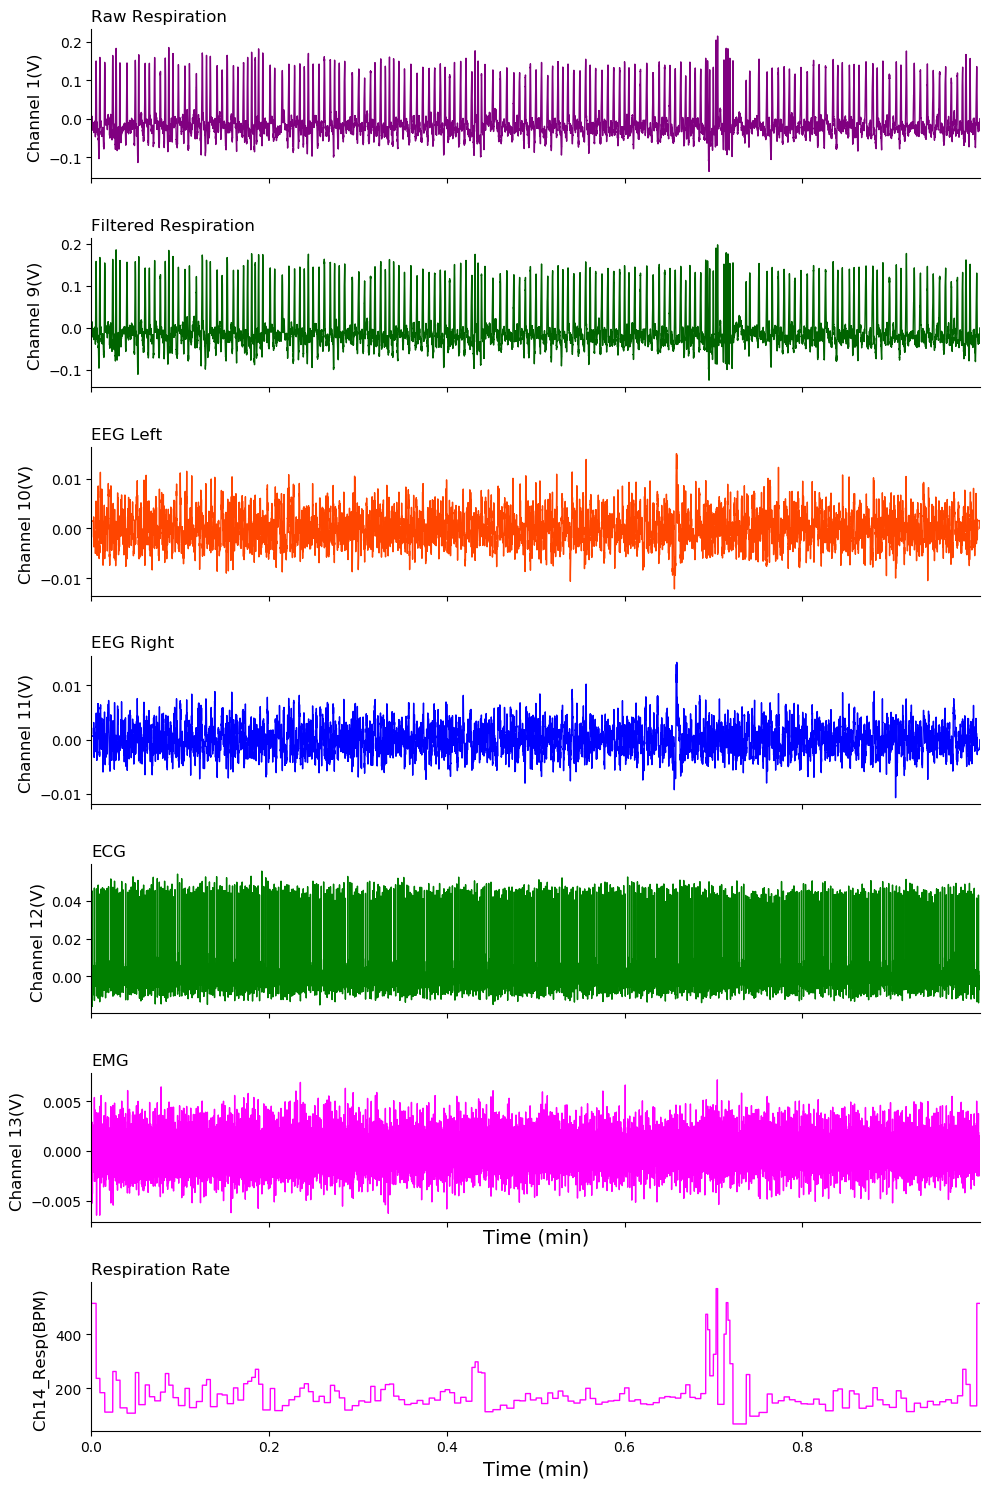

In [6]:
plot_end_time = get_plot_length (plot_length, sigbufs)
plot_all(all_signals, sigbufs,signal_labels,plot_start_time, plot_end_time)

### Define Templates

"""
threshold = user input
calculate baseline by finding the standard deviation (below threshold) and excluding any outliers (> 2* the std dev)
save those excluded into a list
average the list and plot the data
if the data look like a real spike, then there's your template
"""

Define an ECG template
ecg_baseline = 
ecg_threshold = 
ecg_min_width = 
ecg_half_width = 
ecg_max_width =


Define an EMG template
ecg_baseline = 
ecg_threshold = 
ecg_min_width = 
ecg_half_width =
ecg_max_width =


Define respiration spike template
resp_baseline = 
resp_threshold = 
resp_min_width =
ecg_half_width =
resp_max_width =


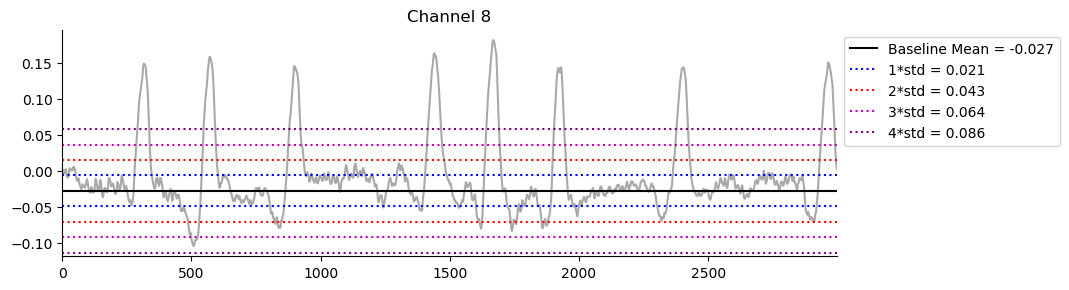

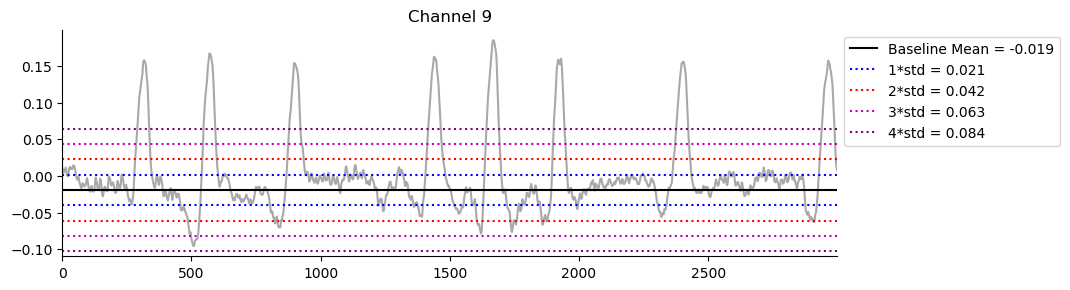

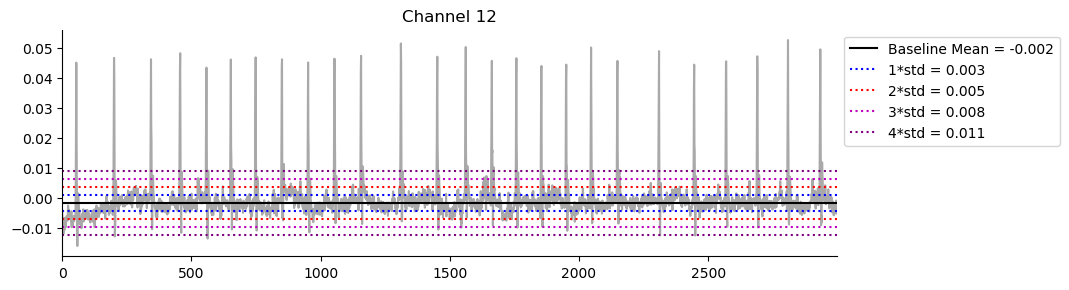

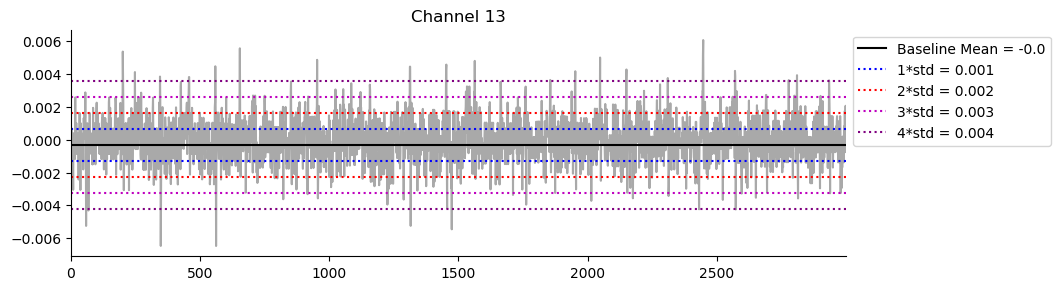

In [7]:
templates = get_events (template_start_time, template_search_length, amp_signals, sigbufs, threshold, True)


# Calculate mean and std of x
# go through whole trace again with threshold as mean + std (fine-turned template)
# Next iterate through events and find continuous stretches of x, and those are events (rough template)

## User Input

Use the plots above to determine which standard deviation you want to use as your threshold. 

The higher the standard deviation, the more stringent the event detection rules.

In [8]:
thresh8 = 4    # Default = 4
thresh9 = 4    # Default = 4
thresh12 = 6   # Default = 4

### Find events


 Analyzing Channel 8
......................................................................................................................................................................
 Analyzing Channel 9
.......................................................................................................................................................................
 Analyzing Channel 12
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

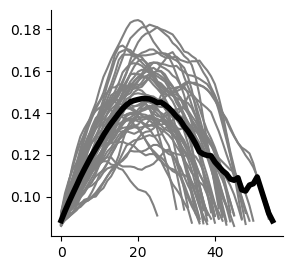

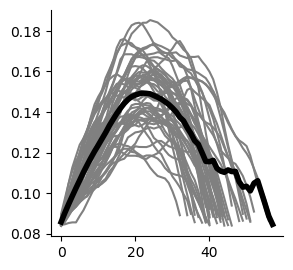

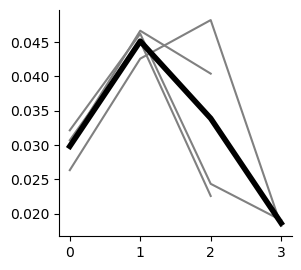

In [11]:
thresholds = [thresh8, thresh9, thresh12]
i = 0
events_list = []
for threshold in thresholds:
    threshold = templates[i][5] * threshold
    search_result = get_event (plot_start_time, plot_length, amp_signals[i], sigbufs, threshold, False)
    events_list.append(search_result[6])
    i = i + 1
i = 0    
for events in events_list:
    print("\n Analyzing Channel " + str(amp_channels[i]))
    plot_events(events)
    i = i + 1

In [10]:
# for each resp interval -> how many card peaks (counts)
    # Plot that oscillation
    # how much variability, mean
    # tag with instantaneous frequency of EEG and EMG
    # FFT on meta oscillations